In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

Wed Jul 10 16:10:07 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 31%   28C    P0   126W / 350W |      1MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:23:00.0 Off |                  N/A |
| 35%   

### Get PNG file list

In [2]:
import os
import numpy as np
from tqdm import tqdm

def find_png_files(directory):
    png_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                full_path = os.path.join(root, file)
                png_files.append(full_path)
    return png_files

# Example usage
directory = '/data/sd_dataset/shark_png'  # Assuming the user wants to search this directory
png_files = find_png_files(directory)
np.random.shuffle(png_files)
len(png_files)

5

### Load BLIP2

In [3]:
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor2 = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model2 = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", device_map={"": 0}, torch_dtype=torch.float16
)  # doctest: +IGNORE_RESULT


2024-07-10 16:10:08.963211: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 16:10:09.613102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Image to Text

In [4]:
def image_to_text(image_file, text=None):
    raw_image = Image.open(image_file).convert('RGB')

    inputs = processor2(images=raw_image, text=text, return_tensors="pt").to('cuda:0', torch.float16)

    generated_ids = model2.generate(**inputs, max_length=50)
    generated_text = processor2.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    return generated_text

In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda

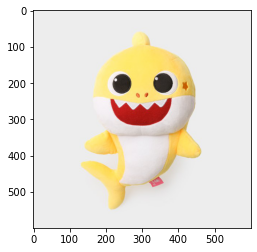

a yellow and white stuffed shark with a big smile


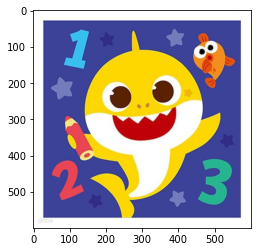

a cartoon shark with numbers and fish


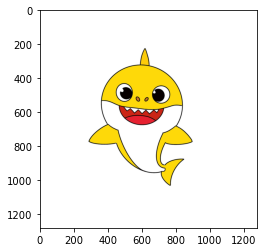

a cartoon shark with a big smile


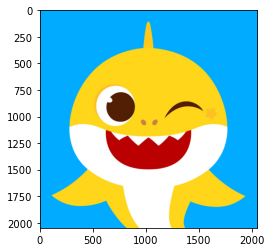

a cartoon shark with big eyes and a smile


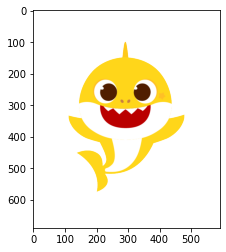

a cartoon shark with a big smile


In [5]:
import matplotlib.pyplot as plt

for png_file in png_files:
    
    plt.imshow(plt.imread(png_file))
    plt.show()
    
    prompt = image_to_text(png_file)
    print(prompt)

In [16]:
# shark를 mychar4로 변환
prompts = ['a yellow and white stuffed mychar4 with a big smile',
           'a cartoon mychar4 with a big smile',
           'a cartoon mychar4 with numbers and fish',
           'a cartoon mychar4 with big eyes and a smile',
           'a cartoon mychar4 with a big smile'
          ]

for png_file, prompt in zip(png_files, prompts):
    txt_file = png_file[:-3] + 'txt'
    with open(txt_file, 'w') as f:
        f.write(prompt)
        
print('done')

done


In [17]:
!ls /data/sd_dataset/shark_png

0.png  0.txt  1.png  1.txt  2.png  2.txt  3.png  3.txt	4.png  4.txt


In [18]:
!cat /data/sd_dataset/shark_png/0.txt

a yellow and white stuffed mychar4 with a big smile